<a href="https://colab.research.google.com/github/toobask/introtoAI1/blob/main/IntroToAI_701_CourseWork_Amua_et_Tooba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries & Dependencies

In [6]:
import pandas as pd
import numpy as np
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")

ImportError: Traceback (most recent call last):
  File "C:\Users\uchechukwu\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [4]:
import tensorflow as tf
print(tf.__version__)

ImportError: Traceback (most recent call last):
  File "C:\Users\uchechukwu\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

## Data Loading, Exploration, & Preprocessing

### Load Data

In [6]:
#load vehicle dataset
#vehicle_df = pd.read_csv("../dataset/vehicle_data.csv")
vehicle_df = pd.read_csv("https://raw.githubusercontent.com/toobask/introtoAI1/main/dataset/vehicle_data.csv")

In [7]:
#check shape of df
vehicle_df.shape
print(f"This dataframe contains {vehicle_df.shape[0]} rows and {vehicle_df.shape[1]} columns.")

This dataframe contains 123971 rows and 19 columns.


In [8]:
#view first 5 rows
vehicle_df[:5]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [9]:
#display column names
vehicle_df.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

### EDA

Here, we explore individual features.

#### Title & Sub-title

In [12]:
#view content of title and sub title columns
vehicle_df[["Title", "Sub_title"]]

,Title,Sub_title
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur..."
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku..."
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo"
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo"
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha"
...,...,...
123966,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela"
123967,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo"
123968,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo"
123969,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...


#### Brand

In [14]:
#view brand column
vehicle_df.Brand

0          Honda
1         Jaguar
2         Toyota
3         Toyota
4         Toyota
           ...  
123966     Honda
123967      HINO
123968       TVS
123969    Toyota
123970    Suzuki
Name: Brand, Length: 123971, dtype: object

In [15]:
#view unique brands
vehicle_df.Brand.unique()

array(['Honda', 'Jaguar', 'Toyota', 'Mitsubishi', 'Suzuki', 'MG',
       'Peugeot', 'BMW', 'Mercedes Benz', 'Mazda', 'Land Rover',
       'Hyundai', 'Micro', 'Audi', 'Daihatsu', 'Nissan', 'Lexus', 'Kia',
       'Tata', 'Perodua', 'Ford', 'Chery', 'Renault', 'Aston Martin',
       'Chevrolet', 'Other brand', 'Subaru', 'Alfa Romeo', 'Zotye',
       'DFSK', 'Mahindra', 'Skoda', 'Volkswagen', 'Maruti Suzuki', 'Jeep',
       'Ssang Yong', 'Hummer', 'Datsun', 'Tesla', 'Mini', 'Isuzu', 'Fiat',
       'Porsche', 'Morris', 'Austin', 'Opel', 'Daewoo', 'Proton', 'Volvo',
       'Rover', 'Chrysler', 'Maruti', 'Geely', 'Citroen', 'Smart',
       'Moto Guzzi', 'Vauxhall', 'Pontiac', 'SEAT', 'Changan', 'Buick',
       'TVS', 'Hero', 'Mercedes-Benz', 'Bajaj', 'Piaggio', 'Yamaha',
       'Other', 'JAC', 'FAW', 'Ashok-Leyland', 'Komatsu', 'Kubota',
       'Eicher', 'Massey-Ferguson', 'Ranomoto', 'Force', 'Demak',
       'Hero-Honda', 'Sonalika', 'Foton', 'Kinetic', 'Yanmar', 'Kobelco',
       'Loncin', 

In [16]:
#how many brands are there?
print(f"There are {vehicle_df.Brand.nunique()} unique vehicle brands.")

There are 123 unique vehicle brands.


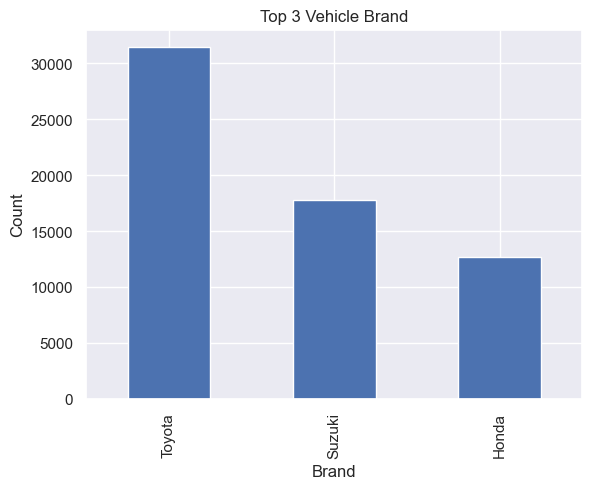

In [17]:
#what are the top 3 brands
top3_brands = vehicle_df.Brand.value_counts().head(3)

#plot top3 brands
top3_brands.plot(kind="bar")
plt.title("Top 3 Vehicle Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

#### Model

In [19]:
#view model column
vehicle_df.Model

0                      Vezel
1                         XF
2                        CHR
3                        CHR
4         Land Cruiser Prado
                 ...        
123966           Insight Ze3
123967                 Dutro
123968                  King
123969                  Vitz
123970                  Alto
Name: Model, Length: 123971, dtype: object

In [20]:
#how many vehicle models are present in the dataset
print(f"There are {vehicle_df.Model.nunique()} unique vehicle models.")

There are 8506 unique vehicle models.


Text(0, 0.5, 'Count')

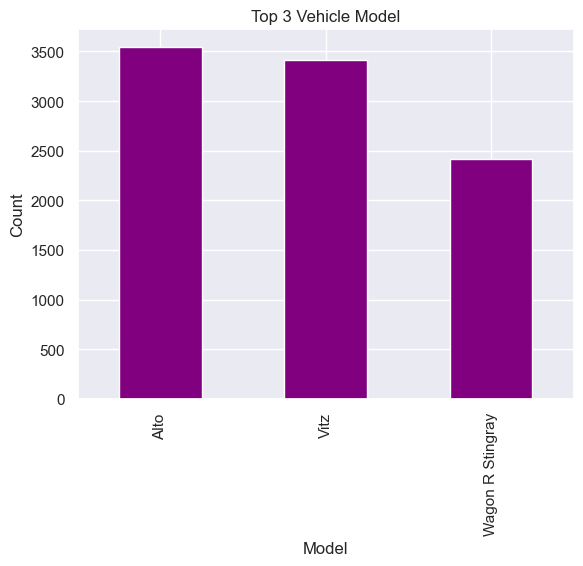

In [21]:
#what are the top3 models
top3_models = vehicle_df.Model.value_counts().head(3)

#show top3 models in a plot
top3_models.plot(kind="bar", color="purple")
plt.title("Top 3 Vehicle Model")
plt.xlabel("Model")
plt.ylabel("Count")

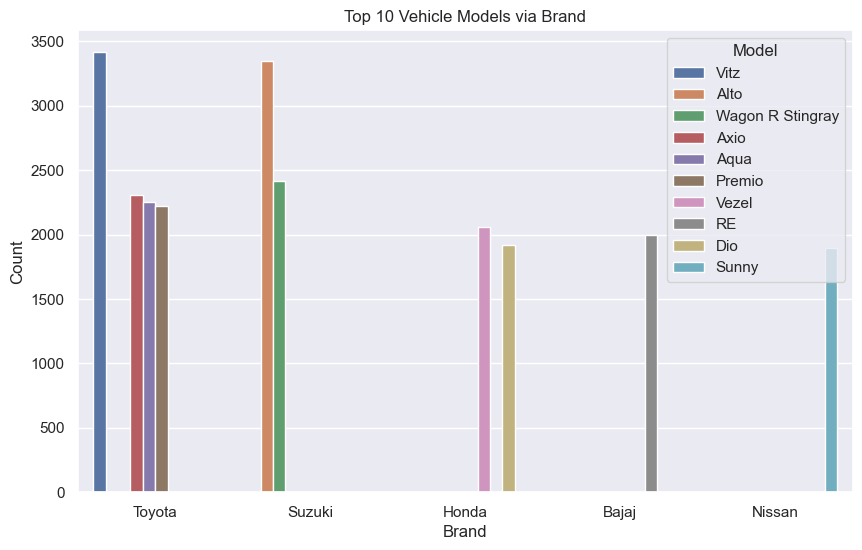

In [22]:
#group data by brand and model
brand_model = vehicle_df.groupby(["Brand", "Model"]).size().reset_index(name="Count")

#retrieve top 5 brand and model
top10_brand_model = brand_model.sort_values(by="Count", ascending=False).head(10)

#plot top 5 brand and model
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_brand_model, x="Brand", y="Count", hue="Model")
plt.title("Top 10 Vehicle Models via Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

#### Edition

In [24]:
#inspect edition column
vehicle_df.Edition

0                 Limited
1            Fully Loaded
2         GT New Face 2wd
3                  Toyato
4                   prado
               ...       
123966                NaN
123967                NaN
123968                NaN
123969                NaN
123970                NaN
Name: Edition, Length: 123971, dtype: object

In [25]:
#check number of null values in Edition column
vehicle_df.Edition.isnull().sum()

76433

In [26]:
#how many unique editions
print(f"There are {vehicle_df.Edition.nunique()} unique editions.")

There are 15260 unique editions.


In [27]:
#count unique editions
vehicle_df.Edition.value_counts()

Edition
Toyota                 780
G Grade                629
G Superior             608
Suzuki                 390
-                      346
                      ... 
106 hilux 4wd            1
SURF 4WD                 1
Extreme Full Option      1
GP2 Navy                 1
G -TURBO                 1
Name: count, Length: 15260, dtype: int64

#### Year

In [29]:
#view first 5 samples of year column
vehicle_df.Year.head()

0    2017
1    2013
2    2020
3    2017
4    2015
Name: Year, dtype: int64

In [30]:
#what year occurs the most
vehicle_df.Year.value_counts()

Year
2015    11547
2017    11066
2018    10228
2016     8768
2014     7878
        ...  
1937        1
2557        1
2561        1
2550        1
1949        1
Name: count, Length: 89, dtype: int64

In [31]:
#unique years represented
vehicle_df.Year.unique()

array([2017, 2013, 2020, 2015, 2007, 2018, 2019, 2016, 2008, 1995, 2012,
       2014, 2010, 1985, 2003, 2005, 1999, 2004, 2001, 2011, 1982, 1989,
       1980, 2006, 2009, 1993, 2000, 1990, 1988, 1981, 1983, 1979, 2002,
       1978, 1991, 1996, 1997, 1984, 2021, 1998, 1987, 1986, 1992, 1994,
       1960, 1975, 1958, 1971, 1976, 1956, 1959, 1953, 1967, 1969, 1973,
       1972, 1951, 1955, 1946, 1968, 1961, 1970, 1974, 1966, 1977, 1937,
       1963, 1947, 1952, 1965, 1950, 1927, 1957, 1964, 1945, 1935, 1936,
       1938, 1962, 1922, 2022, 1954,    0, 1948, 1900, 2557, 2561, 2550,
       1949], dtype=int64)

In [32]:
#replace invalid years (0, 2557, 2561, 2550) with NaN
vehicle_df.Year = vehicle_df.Year.replace([0, 2557, 2561, 2550], np.nan)

In [33]:
#how many years are represented?
vehicle_df.Year.nunique()

85

In [34]:
#range of years represented
range = vehicle_df.Year.sort_values().unique()
print(f"The years represented range from {range[0]} to {range[-2]}.")

The years represented range from 1900.0 to 2022.0.


#### Condition

In [36]:
#view unique vehicle condition
vehicle_df.Condition.unique()

array(['Used', 'Reconditioned', 'New', 'e', 'Recondition'], dtype=object)

In [37]:
#count values in vehicle condition column
vehicle_df.Condition.value_counts()

Condition
Used             120207
Reconditioned      1465
Recondition        1076
e                   617
New                 606
Name: count, dtype: int64

In [38]:
#replace recondition with reconditioned and e with NaN
vehicle_df.Condition = vehicle_df.Condition.replace({"Recondition": "Reconditioned", "e": np.nan})

In [39]:
#confirm changes
vehicle_df.Condition.value_counts()

Condition
Used             120207
Reconditioned      2541
New                 606
Name: count, dtype: int64

In [40]:
#check for missing values in condition column
vehicle_df.Condition.isna().sum()

617

#### Transmission

In [42]:
#view the transmission column
vehicle_df.Transmission

0         Automatic
1         Automatic
2         Automatic
3         Automatic
4         Automatic
            ...    
123966    Automatic
123967       Manual
123968       Manual
123969    Automatic
123970       Manual
Name: Transmission, Length: 123971, dtype: object

In [43]:
#what unique types of transmission are there?
vehicle_df.Transmission.unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission', '2001',
       '11', '150', '2', '0', '1490', '1000', '444444444', '450', nan,
       '205', '200', '125', '1200', '50', '175', '1500', '650'],
      dtype=object)

In [44]:
#display value counts of unique transmission
vehicle_df.Transmission.value_counts()

Transmission
Automatic             75620
Manual                42954
Tiptronic              5319
Other transmission       45
205                       5
150                       5
175                       4
0                         4
1500                      2
50                        1
1200                      1
125                       1
200                       1
1000                      1
450                       1
444444444                 1
1490                      1
2                         1
11                        1
2001                      1
650                       1
Name: count, dtype: int64

In [45]:
#we see some invalid transmission types in the transmission column
#create list of valid transmission types
valid_transmissions = ["Automatic", "Manual", "Tiptronic", "Other transmission"]

#use list to filter out invalid transmission type
vehicle_df = vehicle_df[vehicle_df.Transmission.isin(valid_transmissions)]

In [46]:
#confirm changes
vehicle_df.Transmission.value_counts()

Transmission
Automatic             75620
Manual                42954
Tiptronic              5319
Other transmission       45
Name: count, dtype: int64

#### Body

In [48]:
#inspect body column
vehicle_df.Body

0            SUV / 4x4
1               Saloon
2            SUV / 4x4
3            SUV / 4x4
4            SUV / 4x4
              ...     
123966             Car
123967    Unregistered
123968     Three Wheel
123969             Car
123970             Car
Name: Body, Length: 123938, dtype: object

In [49]:
#check unique values in body column
vehicle_df.Body.unique()

array(['SUV / 4x4', 'Saloon', nan, 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon', 'Lorry', 'Van', 'Motorbike',
       'Pickup', 'Car', 'Three Wheel', 'SUV', 'Brand', 'Wagon', 'Other',
       'Tractor', 'Unregistered', 'Bus', 'Heavy-Duty', 'Cab'],
      dtype=object)

In [50]:
#get nnumber of unique values in body column
vehicle_df.Body.nunique()

22

In [51]:
#count unique values in body column
vehicle_df.Body.value_counts()

Body
Car              21981
Hatchback        21031
Saloon           18810
Motorbike        15723
SUV / 4x4        12641
Van               5593
Three Wheel       5078
Lorry             4245
SUV               3582
Station wagon     2683
Pickup            1492
Unregistered      1076
Bus               1070
Tractor            779
MPV                614
Brand              614
CoupÃ©/Sports      576
Wagon              513
Heavy-Duty         351
Convertible        230
Cab                158
Other                3
Name: count, dtype: int64

In [52]:
#group or add unregistered to other values in the body column
vehicle_df.Body = vehicle_df.Body.replace("Unregistered", "Other")

In [53]:
#confirm changes
vehicle_df.Body.value_counts()

Body
Car              21981
Hatchback        21031
Saloon           18810
Motorbike        15723
SUV / 4x4        12641
Van               5593
Three Wheel       5078
Lorry             4245
SUV               3582
Station wagon     2683
Pickup            1492
Other             1079
Bus               1070
Tractor            779
MPV                614
Brand              614
CoupÃ©/Sports      576
Wagon              513
Heavy-Duty         351
Convertible        230
Cab                158
Name: count, dtype: int64

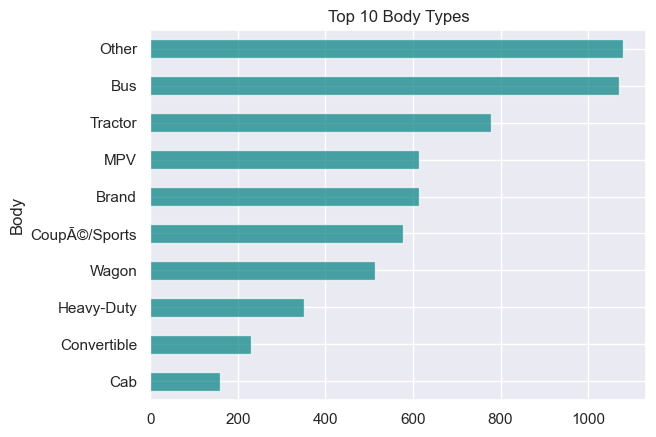

In [54]:
#top 10 body types
top10_body = vehicle_df.Body.value_counts().sort_values(ascending=True).head(10)

#plot top 10 body types
top10_body.plot(kind="barh", color="teal", alpha=0.7)
plt.title("Top 10 Body Types")
plt.show()

In [55]:
#check for missing values in Body column
vehicle_df.Body.isna().sum()

5095

#### Fuel

In [57]:
#what kind of fuel do the vehicles use?
vehicle_df.Fuel.unique()

array(['Hybrid', 'Diesel', 'Petrol', 'CNG', 'Electric', 'Other fuel type',
       'Gas'], dtype=object)

In [58]:
#what are the top 3 fuel models used
vehicle_df.Fuel.value_counts()[:3]

Fuel
Petrol    86702
Diesel    22771
Hybrid    13846
Name: count, dtype: int64

#### Capacity

In [60]:
#capacity
vehicle_df.Capacity.head()

0    1,500 cc
1    2,200 cc
2    1,200 cc
3    1,200 cc
4    2,700 cc
Name: Capacity, dtype: object

In [61]:
#what unique capacity types are present?
vehicle_df.Capacity.unique()

array(['1,500 cc', '2,200 cc', '1,200 cc', ..., '7300', '66', '5475'],
      dtype=object)

In [62]:
#how many unique capacity types are present
vehicle_df.Capacity.nunique()

1873

In [63]:
#convert values in capacity column to int
#first, we replace the commas and cc
vehicle_df.Capacity = vehicle_df.Capacity.str.replace(",", "")
vehicle_df.Capacity = vehicle_df.Capacity.str.replace("cc", "")

#next, convert to numeric column
vehicle_df.Capacity = pd.to_numeric(vehicle_df.Capacity, errors="coerce")

In [64]:
#view changes in capacity column
vehicle_df.Capacity.head()

0    1500.0
1    2200.0
2    1200.0
3    1200.0
4    2700.0
Name: Capacity, dtype: float64

In [65]:
#frequent 3 capacity range
vehicle_df.Capacity.value_counts().head(3)

Capacity
1500.0    20316
1000.0    10539
650.0      7759
Name: count, dtype: int64

#### Mileage

In [67]:
#view first 5 rows of mileage column
vehicle_df.Mileage.head()

0    37,000 km
1    42,000 km
2    15,000 km
3    21,000 km
4    57,000 km
Name: Mileage, dtype: object

In [68]:
#convert values in mileage column to int
#first, we replace the commas and km
vehicle_df.Mileage = vehicle_df.Mileage.str.replace(",", "")
vehicle_df.Mileage = vehicle_df.Mileage.str.replace("km", "")

#next, convert to numeric column
vehicle_df.Mileage = pd.to_numeric(vehicle_df.Mileage, errors="coerce")

In [69]:
#view changes
vehicle_df.Mileage.head()

0    37000.0
1    42000.0
2    15000.0
3    21000.0
4    57000.0
Name: Mileage, dtype: float64

#### Location

In [71]:
#view unique values in location column
vehicle_df.Location.unique()

array([' Kurunegala City,  Kurunegala', ' Colombo 7,  Colombo',
       ' Kelaniya,  Gampaha', ' Gampaha City,  Gampaha',
       ' Maharagama,  Colombo', ' Angoda,  Colombo',
       ' Boralesgamuwa,  Colombo', ' Galle City,  Galle',
       ' Rambukkana,  Kegalle', ' Ruwanwella,  Kegalle',
       ' Negombo,  Gampaha', ' Nugegoda,  Colombo',
       ' Anuradhapura City,  Anuradhapura', ' Kohuwala,  Colombo',
       ' Ragama,  Gampaha', ' Katugastota,  Kandy',
       ' Wennappuwa,  Puttalam', ' Embilipitiya,  Ratnapura',
       ' Colombo 2,  Colombo', ' Panadura,  Kalutara',
       ' Piliyandala,  Colombo', ' Digana,  Kandy',
       ' Tissamaharama,  Hambantota', ' Dehiwala,  Colombo',
       ' Godagama,  Colombo', ' Kaduwela,  Colombo', ' Wattala,  Gampaha',
       ' Malabe,  Colombo', ' Kottawa,  Colombo', ' Kotte,  Colombo',
       ' Colombo 6,  Colombo', ' Battaramulla,  Colombo',
       ' Colombo 4,  Colombo', ' Jaffna City,  Jaffna',
       ' Ja-Ela,  Gampaha', ' Kandana,  Gampaha', '

In [72]:
#get number of unique locations present
vehicle_df.Location.nunique()

328

#### Description & Post Url

In [74]:
#view contents of description and post url columns
vehicle_df[["Description", "Post_URL"]]

,Description,Post_URL
0,HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...
1,1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...
2,2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...
3,Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...
4,Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...
...,...,...
123966,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/honda-insight-ze3-s...
123967,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/hino-dutro-sale-col...
123968,-,https://riyasewana.com/buy/tvs-king-sale-colom...
123969,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-vitz-sale-ta...


#### Seller Name & Type

In [76]:
#view content of seller name and seller type columns
vehicle_df[["Seller_name", "Seller_type"]]

,Seller_name,Seller_type
0,Prasad Enterprises,Premium-Member
1,Dhanushka Dharmasri,Member
2,Carzone Lanka,Member
3,Carzone Lanka,Member
4,Shine Music Center,Member
...,...,...
123966,Duminda,Member
123967,Areej,Member
123968,Safan,Member
123969,Sampath Kodithuwakku,Member


In [77]:
#inspect uniqueness of seller type column
vehicle_df["Seller_type"].unique()

array(['Premium-Member', 'Member'], dtype=object)

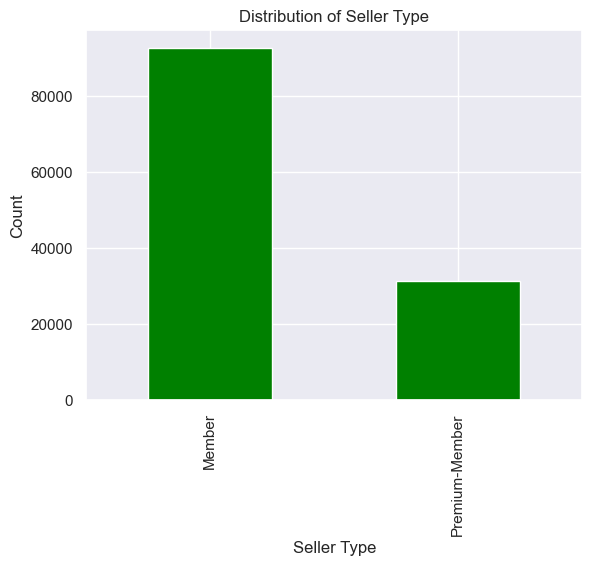

In [78]:
#view distribution of seller type
vehicle_df["Seller_type"].value_counts()

#plot distribution
vehicle_df["Seller_type"].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.show()

#### Published Date

In [80]:
#view published date column
vehicle_df["published_date"]

0         2022-09-01 14:45:00
1         2022-09-28 10:23:00
2         2022-09-16 13:16:00
3         2022-09-30 10:12:00
4         2022-09-30 21:50:00
                 ...         
123966    2021-11-04 23:41:00
123967    2021-11-04 23:39:00
123968    2021-11-04 23:38:00
123969    2021-11-04 23:38:00
123970    2021-11-04 23:37:00
Name: published_date, Length: 123938, dtype: object

#### Redundant Features

After careful observation of the features, it was concluded that some of the features such as the title, subtitle, description, among others had no bearing on the target variable "Price". It was therefore imperative to have them removed.

In [82]:
#drop redundant columns
vehicle_df = vehicle_df.drop(["Title", "Sub_title", "Seller_name", "published_date", "Description", "Post_URL"], axis=1)
vehicle_df.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Seller_type
0,"Rs 12,900,000",Honda,Vezel,Limited,2017.0,Used,Automatic,SUV / 4x4,Hybrid,1500.0,37000.0,"Kurunegala City, Kurunegala",Premium-Member
1,"Rs 16,250,000",Jaguar,XF,Fully Loaded,2013.0,Used,Automatic,Saloon,Diesel,2200.0,42000.0,"Kurunegala City, Kurunegala",Member
2,"Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020.0,Used,Automatic,SUV / 4x4,Petrol,1200.0,15000.0,"Colombo 7, Colombo",Member
3,"Rs 13,000,000",Toyota,CHR,Toyato,2017.0,Used,Automatic,SUV / 4x4,Petrol,1200.0,21000.0,"Colombo 7, Colombo",Member
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015.0,Used,Automatic,SUV / 4x4,Petrol,2700.0,57000.0,"Kelaniya, Gampaha",Member


In [83]:
#view changes
vehicle_df.columns

Index(['Price', 'Brand', 'Model', 'Edition', 'Year', 'Condition',
       'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage', 'Location',
       'Seller_type'],
      dtype='object')

#### Price (Target Variable)

In [85]:
#view first few rows of price
vehicle_df.Price.head()

0    Rs 12,900,000
1    Rs 16,250,000
2    Rs 17,000,000
3    Rs 13,000,000
4    Rs 33,500,000
Name: Price, dtype: object

In [86]:
#get stats of price column
vehicle_df.Price.describe()

count          123938
unique           5318
top        Negotiable
freq             5508
Name: Price, dtype: object

In [87]:
#get value counts
vehicle_df.Price.value_counts()

Price
 Negotiable       5508
Rs 6,500,000       361
Rs 5,500,000       354
Rs 8,500,000       334
Rs 7,500,000       314
                  ... 
Rs 1,282,000         1
Rs 13,740,000        1
 Rs. 6,670,000       1
Rs 65,600,000        1
Rs 9,999,000         1
Name: count, Length: 5318, dtype: int64

In [88]:
#convert values in price column to int
#first, we replace the commas and km
vehicle_df.Price = vehicle_df.Price.str.replace(",", "")
vehicle_df.Price = vehicle_df.Price.str.replace("Rs", "")

#next, convert to numeric column
vehicle_df.Price = pd.to_numeric(vehicle_df.Price, errors="coerce")

In [89]:
#view changes in price column
vehicle_df.Price.head()

0    12900000.0
1    16250000.0
2    17000000.0
3    13000000.0
4    33500000.0
Name: Price, dtype: float64

In [90]:
#what is the average price of a vehicle
average_price = vehicle_df.Price.mean()
print(f"The average price of a vehicle is Rs {average_price:.2f}.")

The average price of a vehicle is Rs 9196272.72.


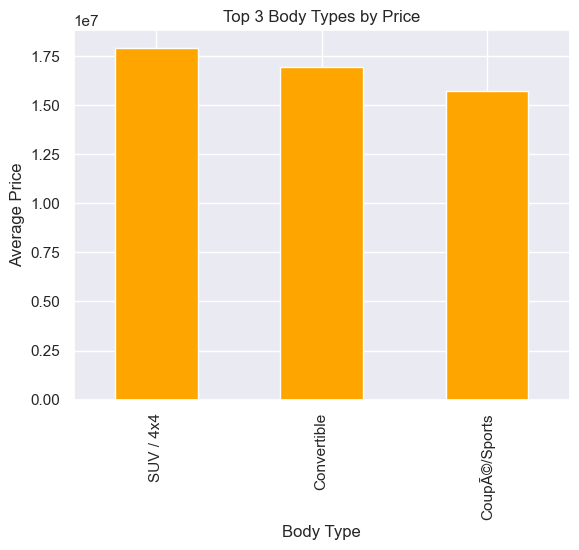

In [91]:
#body types by price
body_price = vehicle_df.groupby("Body")["Price"].mean()

#top 3 body typbes by price
top3_body_price = body_price.sort_values(ascending=False).head(3)

#plot top 3 body types by price
top3_body_price.plot(kind="bar", color="orange")
plt.title("Top 3 Body Types by Price")
plt.xlabel("Body Type")
plt.ylabel("Average Price")
plt.show()

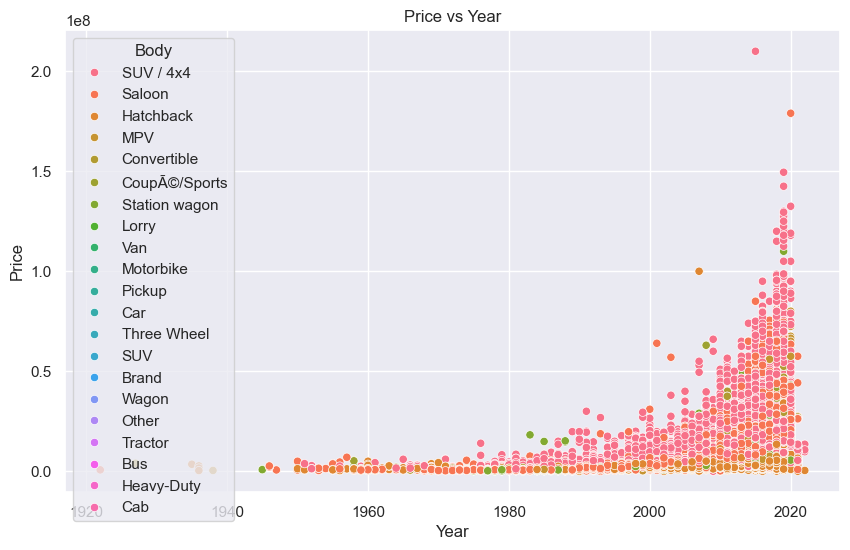

In [92]:
#scatter plot showing relationship between price and year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicle_df, x="Year", y="Price", hue="Body")
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

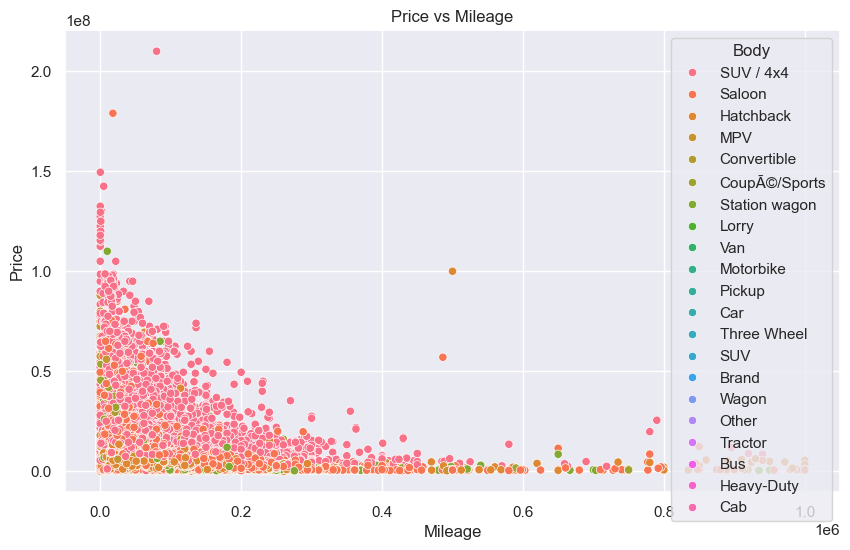

In [93]:
#scatter plot showing relation between price and mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicle_df, x="Mileage", y="Price", hue="Body")
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

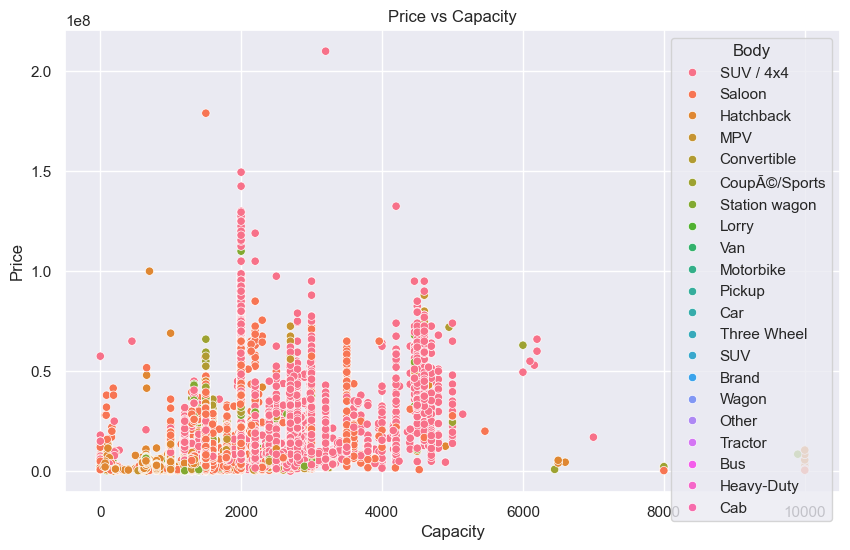

In [94]:
#scatter plot showing relation between price and capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicle_df, x="Capacity", y="Price", hue="Body")
plt.title("Price vs Capacity")
plt.xlabel("Capacity")
plt.ylabel("Price")
plt.show()

### Missing Values Handling

Here, we handle missing values. If missing values greater than 51% of the length of column, the column is dropped. If less than 5% of the length of column, the rows are dropped. Otherwise, missing values are filled by imputation.

In [96]:
#get sum of missing values across columns
vehicle_df.isnull().sum()

Price           62258
Brand               0
Model               1
Edition         76400
Year               19
Condition         614
Transmission        0
Body             5095
Fuel                0
Capacity         4752
Mileage          5674
Location            0
Seller_type         0
dtype: int64

In [97]:
#calculate missing percentage
missing_percentage = vehicle_df.isna().sum() / len(vehicle_df) * 100
print(missing_percentage)

Price           50.233181
Brand            0.000000
Model            0.000807
Edition         61.643725
Year             0.015330
Condition        0.495409
Transmission     0.000000
Body             4.110926
Fuel             0.000000
Capacity         3.834175
Mileage          4.578095
Location         0.000000
Seller_type      0.000000
dtype: float64


#### Handle missing values greater than 51% of sample size

In [99]:
#drop edition column due to missing values over 51% threshold
vehicle_df.drop("Edition", axis=1, inplace=True)

#### Imputation of missing values in price column by regression

There are about 50% or half the values of the target variable "Price" missing. Here we try to impute the missing values using regression.

In [101]:
#split the dataset into rows with and without missing values in the price column
price_missing = vehicle_df[vehicle_df["Price"].isna()]
price_not_missing = vehicle_df[~vehicle_df["Price"].isna()]

In [102]:
#view shape of price_missing and price_not_missing splitted dataframe
display(price_missing.shape, price_not_missing.shape)

(62258, 12)

(61680, 12)

In [103]:
#split the dataset without missing values into features and target variables
X = price_not_missing.drop("Price", axis=1)
y = price_not_missing["Price"]

In [104]:
#get features from dataset with missing values as well
#this would be used as our test data to get missing values/predictions after training
X_missing = price_missing.drop("Price", axis=1)

In [105]:
#convert cat columns available to numeric in preparation for training
X = pd.get_dummies(X, drop_first=True)
X_missing = pd.get_dummies(X_missing, drop_first=True)

In [106]:
#check shape after conversion using dummies
display(X.shape, X_missing.shape)

(61680, 888)

(62258, 8532)

In [107]:
#we have to align the columns of the features from those with missing values
#with those without missing values to ensure they have same structure
X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

In [108]:
#check shape again
display(X.shape, X_missing.shape)
print()
print("All good!")

(61680, 888)

(62258, 888)


All good!


In [109]:
#time to train the regressor to predict missing prices
model = RandomForestRegressor(random_state=36)
model.fit(X, y)

RandomForestRegressor(random_state=36)

In [110]:
#time to predict the missing prices
predicted_prices = model.predict(X_missing)
predicted_prices

array([2013069.04761905, 4775075.        , 3603076.19047619, ...,
       4756916.66666667, 7822811.9047619 , 2782930.83333333])

In [111]:
#time to fill missing values with predictions in the original dataset
vehicle_df.loc[vehicle_df["Price"].isna(), "Price"] = predicted_prices

In [112]:
#confirm missing values have been imputed in the price column
vehicle_df["Price"].isna().sum()

0

#### Handle missing values < 5%

In [114]:
#check missing % again
missing_percentage = vehicle_df.isna().sum() / len(vehicle_df) * 100
print(missing_percentage)

Price           0.000000
Brand           0.000000
Model           0.000807
Year            0.015330
Condition       0.495409
Transmission    0.000000
Body            4.110926
Fuel            0.000000
Capacity        3.834175
Mileage         4.578095
Location        0.000000
Seller_type     0.000000
dtype: float64


In [115]:
#the dataset now contains less than 5% null values across features
#drop rows containing remaining missing values < 5%
vehicle_df.dropna(inplace=True)

In [116]:
#confirm missing values have been handled in dataset
if vehicle_df.isna().sum().sum() == 0:
    print("Hurray!!! There are no more missing values in the dataset.")
else:
    print("Keep cleaning!")

Hurray!!! There are no more missing values in the dataset.


### Rename Columns

In [118]:
#rename price, mileage, and capacity columns to reflect their units
vehicle_df.rename(columns={"Price": "Price (Rs)", "Mileage": "Mileage (km)", \
                           "Capacity": "Capacity (cc)"}, inplace=True)

In [119]:
#view changes
vehicle_df.columns

Index(['Price (Rs)', 'Brand', 'Model', 'Year', 'Condition', 'Transmission',
       'Body', 'Fuel', 'Capacity (cc)', 'Mileage (km)', 'Location',
       'Seller_type'],
      dtype='object')

### Data Preprocessing & Preparation

#### Feature Engineering

In [122]:
#create new price column in pound sterling
vehicle_df["Price (GBP)"] = vehicle_df["Price (Rs)"] * 0.0027

#round decimal values in price new price column to 2 places
vehicle_df["Price (GBP)"] = vehicle_df["Price (GBP)"].round(2)

#drop old price column
vehicle_df.drop("Price (Rs)", axis=1, inplace=True)

#view new column
vehicle_df["Price (GBP)"].head()

0    34830.0
1    43875.0
2    45900.0
3    35100.0
4    90450.0
Name: Price (GBP), dtype: float64

In [123]:
#check info
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109748 entries, 0 to 123970
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Brand          109748 non-null  object 
 1   Model          109748 non-null  object 
 2   Year           109748 non-null  float64
 3   Condition      109748 non-null  object 
 4   Transmission   109748 non-null  object 
 5   Body           109748 non-null  object 
 6   Fuel           109748 non-null  object 
 7   Capacity (cc)  109748 non-null  float64
 8   Mileage (km)   109748 non-null  float64
 9   Location       109748 non-null  object 
 10  Seller_type    109748 non-null  object 
 11  Price (GBP)    109748 non-null  float64
dtypes: float64(4), object(8)
memory usage: 10.9+ MB


In [124]:
#convert categorical data to numeric for machine learning
#by mapping the frequencies of their values to original values
cat_columns = vehicle_df.select_dtypes(include="object").columns

for col in cat_columns:
    freq_encoding = vehicle_df[col].value_counts()
    vehicle_df[col] = vehicle_df[col].map(freq_encoding)

In [125]:
#confirm changes
vehicle_df.sample(10)

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Seller_type,Price (GBP)
42544,16256,676,2018.0,106951,69596,614,12965,660.0,40000.0,149,28820,20925.00
94793,8441,285,2002.0,106951,35020,4471,78083,1800.0,200000.0,1459,80928,7388.85
31828,5724,1255,2000.0,106951,69596,18810,78083,1495.0,166652.0,730,28820,10786.50
74429,5724,1,1985.0,106951,69596,3353,18171,2500.0,120000.0,3665,80928,6358.48
37653,11547,1810,2014.0,106951,69596,2683,12965,1500.0,79000.0,113,80928,21330.00
63493,1861,20,2016.0,106951,69596,14248,78083,200.0,40000.0,5220,80928,18936.99
40619,1317,33,2017.0,106951,69596,21031,78083,1000.0,68000.0,110,28820,14040.00
51760,1225,422,2012.0,106951,69596,12641,18171,2200.0,170000.0,378,80928,31050.00
71825,2096,1,2016.0,106951,69596,20339,78083,1500.0,64000.0,5220,80928,43992.56
14900,8441,1775,1978.0,106951,35020,18810,78083,1500.0,80000.0,133,80928,1350.00


In [126]:
#check new shape of dataframe
print(f"The DataFrame now contains {vehicle_df.shape[0]} rows and {vehicle_df.shape[1]} columns.")

The DataFrame now contains 109748 rows and 12 columns.


In [127]:
#check correlation between features
correlation = vehicle_df.corr()
correlation

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Seller_type,Price (GBP)
Brand,1.000000,0.446097,0.033257,0.004815,0.254446,0.208030,-0.043029,-0.003727,-0.006796,-0.050715,-0.054890,-0.008310
Model,0.446097,1.000000,0.152294,0.005157,0.120352,0.304798,0.056897,-0.001132,-0.009375,-0.109651,-0.130463,-0.050742
Year,0.033257,0.152294,1.000000,-0.079608,0.335255,0.101206,-0.000803,0.000359,-0.015087,0.088408,-0.109910,0.367579
Condition,0.004815,0.005157,-0.079608,1.000000,-0.008564,0.079581,-0.012857,0.000537,0.001931,-0.028639,0.098331,-0.101966
Transmission,0.254446,0.120352,0.335255,-0.008564,1.000000,0.208419,0.040498,-0.002043,-0.007829,0.063920,-0.054147,0.083170
Body,0.208030,0.304798,0.101206,0.079581,0.208419,1.000000,0.228306,-0.004189,-0.013022,-0.091783,-0.188858,-0.074744
Fuel,-0.043029,0.056897,-0.000803,-0.012857,0.040498,0.228306,1.000000,-0.001631,-0.000864,-0.001061,0.001647,-0.113853
Capacity (cc),-0.003727,-0.001132,0.000359,0.000537,-0.002043,-0.004189,-0.001631,1.000000,0.041864,-0.001933,0.002926,0.002853
Mileage (km),-0.006796,-0.009375,-0.015087,0.001931,-0.007829,-0.013022,-0.000864,0.041864,1.000000,-0.001112,0.008489,-0.006850
Location,-0.050715,-0.109651,0.088408,-0.028639,0.063920,-0.091783,-0.001061,-0.001933,-0.001112,1.000000,0.021618,0.063160


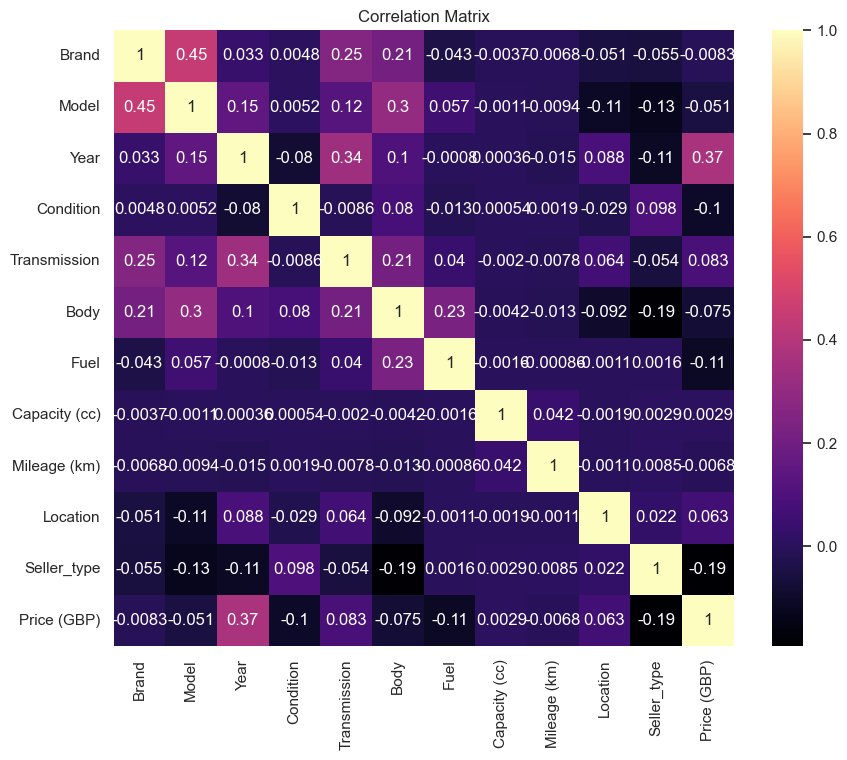

In [128]:
#plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="magma")
plt.title("Correlation Matrix")
plt.show()

#### Data Splitting

First Split

In [131]:
#split into features and target
X = vehicle_df.drop("Price (GBP)", axis=1)
y = vehicle_df["Price (GBP)"]

In [132]:
#check shape of features
print(f"There are {X.shape[1]} features with a total of {X.shape[0]} samples.")
print()
#view first few rows of features
X.head()

There are 11 features with a total of 109748 samples.



,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Seller_type
0,11547,1810,2017.0,106951,69596,12641,12965,1500.0,37000.0,954,28820
1,131,44,2013.0,106951,69596,18810,18171,2200.0,42000.0,954,80928
2,28549,829,2020.0,106951,69596,12641,78083,1200.0,15000.0,396,80928
3,28549,829,2017.0,106951,69596,12641,78083,1200.0,21000.0,396,80928
4,28549,1411,2015.0,106951,69596,12641,78083,2700.0,57000.0,567,80928


In [133]:
#view target variable
y.head()

0    34830.0
1    43875.0
2    45900.0
3    35100.0
4    90450.0
Name: Price (GBP), dtype: float64

Second Split

In [135]:
#split data into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=36)

In [136]:
#display shape of splitted feature data
display(X_train.shape, X_val.shape, X_test.shape)

(79018, 11)

(8780, 11)

(21950, 11)

In [137]:
#display shape of splitted target data
display(y_train.shape, y_val.shape, y_test.shape)

(79018,)

(8780,)

(21950,)

#### Feature Scaling

In [139]:
#feature scaling
#instantiating the standard scaler
scaler = StandardScaler()

#fit scaler to X_train
scaler.fit(X_train)

#transform X_train , X_val, and X_test
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Development

### Baseline Model - Linear Regressor

In [142]:
#initialize the baseline model
baseline_model = LinearRegression()

#train baseline
baseline_model.fit(X_train, y_train)

LinearRegression()

Get Predictions

In [144]:
#get prediction on the validation set
y_val_pred_bl = baseline_model.predict(X_val)

#get mse
mse_val_bl = mean_squared_error(y_val, y_val_pred_bl)

#calculate rmse
rmse_val_bl = np.sqrt(mse_val_bl)

#get r2 score
r2_val_bl = r2_score(y_val, y_val_pred_bl)

#display scores
print(f"Validation Baseline Model - Root Mean Squared Error: {rmse_val_bl:.2f}")
print(f"Validation Baseline Model - R-squared Score: {r2_val_bl:.2f}")

Validation Baseline Model - Root Mean Squared Error: 21005.13
Validation Baseline Model - R-squared Score: 0.20


Evaluation - Baseline

In [146]:
#get predictions on X_test
y_test_pred_bl = baseline_model.predict(X_test)

#round predictions to two decimal places
y_test_pred_bl = np.round(y_test_pred_bl, 2)
y_test_pred_bl

array([-4316.13, 29346.55, 38179.93, ..., 29411.4 , 24097.15, 16421.81])

In [147]:
#get mse on y_test
mse_baseline = mean_squared_error(y_test, y_test_pred_bl)

#calculate rmse
rmse_baseline = np.sqrt(mse_baseline)

#get r2 score
r2_baseline = r2_score(y_test, y_test_pred_bl)

#display scores
print(f"Baseline Model - Root Mean Squared Error: {rmse_baseline:.2f}")
print(f"Baseline Model - R-squared Score: {r2_baseline:.2f}")

Baseline Model - Root Mean Squared Error: 20898.92
Baseline Model - R-squared Score: 0.20


In [148]:
#display actual price vs predicted price
price_comparison_bl = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_test_pred_bl})
price_comparison_bl.head(10)

,Actual Price,Predicted Price
119734,1830.10,-4316.13
29497,6480.00,29346.55
37091,14175.00,38179.93
78047,23582.52,25072.52
18518,19575.00,32582.24
109813,3529.24,29282.73
93926,3414.76,18423.78
34081,21600.00,21198.18
4539,13095.00,6706.31
112256,12680.42,21387.12


Features Importances

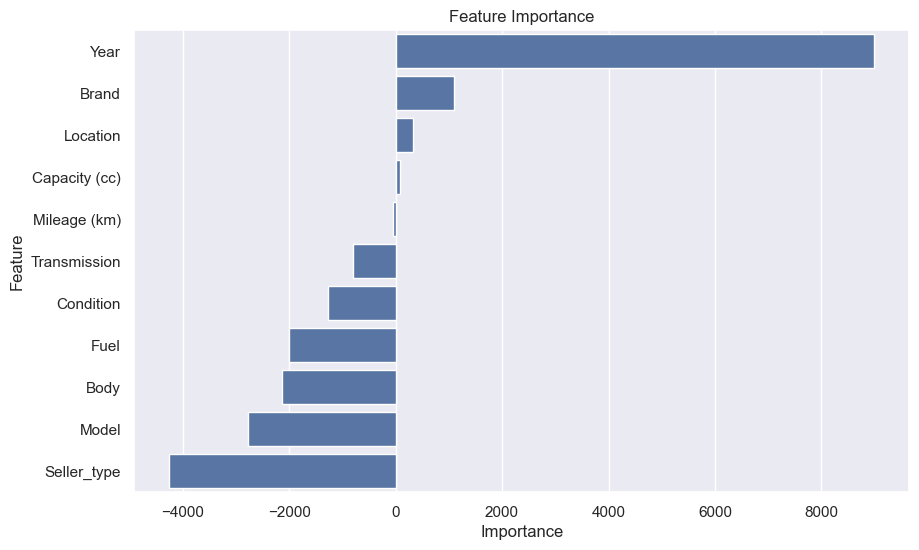

In [150]:
#get features importance for baseline model
feature_importance_bl = pd.DataFrame({"Feature": X.columns, "Importance": baseline_model.coef_})

#sort features in order of importance
feature_importance_bl = feature_importance_bl.sort_values(by="Importance", ascending=False)

#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_bl)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Model One - DecisionTree Regressor

Build Model

In [153]:
#initialize model one
model1 = DecisionTreeRegressor(random_state=42)

#train model
model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Get Predictions

In [155]:
#get predictions on X_val
y_val_pred1 = model1.predict(X_val)

#get mse
mse1_val = mean_squared_error(y_val, y_val_pred1)

#calculate rmse
rmse1_val = np.sqrt(mse1_val)

#get r2 score
r2_val1 = r2_score(y_val, y_val_pred1)

#display scores
print(f"Validation Model One - Root Mean Squared Error: {rmse1_val:.2f}")
print(f"Validation Model One - R-squared Score: {r2_val1:.2f}")

Validation Model One - Root Mean Squared Error: 8338.71
Validation Model One - R-squared Score: 0.87


Hyperparameter Tuning

In [157]:
#initialize decisiontree regressor
model1 = DecisionTreeRegressor(random_state=42)

#define parameters in grid search
param_grid =  {
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

#create grid search
grid_search = GridSearchCV(
    model1,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

#perform the search
grid_search.fit(X_train, y_train)

#retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#display best parameters
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_split': 10}


In [158]:
#model one tuning
#train model1 using best parameters from grid search
model1_Tuned = DecisionTreeRegressor(criterion="squared_error", max_depth=30, min_samples_split=10, random_state=36)
model1_Tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_split=10, random_state=36)

In [159]:
#get predictions on x_val
y_val_pred1 = model1_Tuned.predict(X_val)

#get mse
mse1_val = mean_squared_error(y_val, y_val_pred1)

#calculate rmse
rmse1_val = np.sqrt(mse1_val)

#get r2 score
r2_val1 = r2_score(y_val, y_val_pred1)

#display scores
print(f"Validation Model One (After Tuning) - Root Mean Squared Error: {rmse1_val:.2f}")
print(f"Validation Model One (After Tuning) - R-squared Score: {r2_val1:.2f}")

Validation Model One (After Tuning) - Root Mean Squared Error: 7897.84
Validation Model One (After Tuning) - R-squared Score: 0.89


Evaluation - Model One

In [161]:
#get predictions on X_test
y_test_pred1 = model1_Tuned.predict(X_test)

#round predictions to two decimal places
y_test_pred1 = np.round(y_test_pred1, 2)
y_test_pred1

array([ 1309.5 , 15231.2 , 15592.5 , ..., 26595.  , 15769.69, 12837.64])

In [162]:
#get mse
mse1 = mean_squared_error(y_test, y_test_pred1)

#calculate rmse
rmse1 = np.sqrt(mse1)

#get r2 score
r2_1 = r2_score(y_test, y_test_pred1)

#display scores
print(f"Model One - Root Mean Squared Error: {rmse1:.2f}")
print(f"Model One - R-squared Score: {r2_1:.2f}")

Model One - Root Mean Squared Error: 7566.24
Model One - R-squared Score: 0.89


In [163]:
#display actual price vs predicted price
price_comparison1 = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_test_pred1})
price_comparison1.head(10)

,Actual Price,Predicted Price
119734,1830.10,1309.50
29497,6480.00,15231.20
37091,14175.00,15592.50
78047,23582.52,24107.01
18518,19575.00,22369.50
109813,3529.24,3496.67
93926,3414.76,3414.76
34081,21600.00,23827.50
4539,13095.00,11545.88
112256,12680.42,12634.81


Features Importances

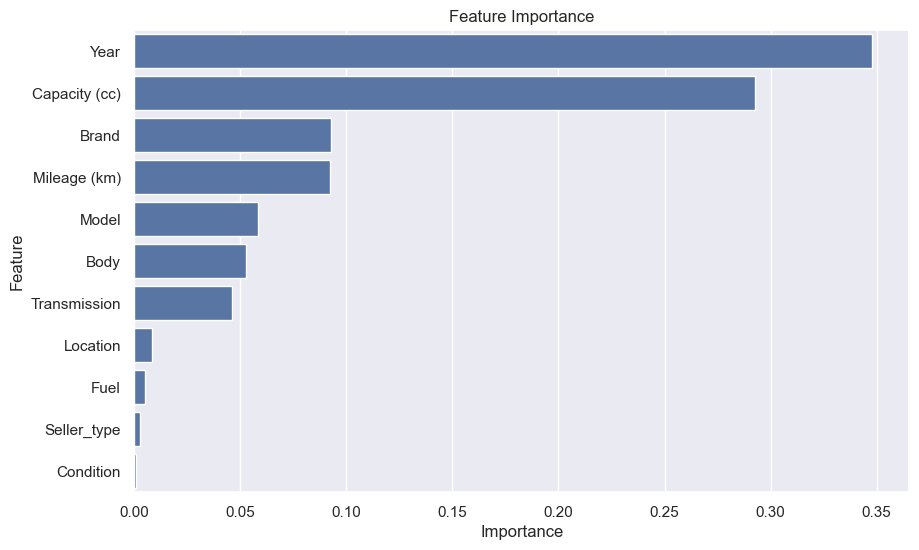

In [165]:
#get features importance for model one
feature_importance1 = pd.DataFrame({"Feature": X.columns, "Importance": model1_Tuned.feature_importances_})

#sort features in order of importance
feature_importance1 = feature_importance1.sort_values(by="Importance", ascending=False)

#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance1)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Model Two - kNeighbors Regressor

Build Model

In [168]:
#initialize model two
model2 = KNeighborsRegressor()

#train model
model2.fit(X_train, y_train)

KNeighborsRegressor()

Get Predictions

In [170]:
#get predictions on X_val
y_val_pred2 = model2.predict(X_val)

#get mse
mse2_val = mean_squared_error(y_val, y_val_pred2)

#calculate rmse
rmse2_val = np.sqrt(mse2_val)

#get r2 score
r2_val2 = r2_score(y_val, y_val_pred2)

#display scores
print(f"Validation Model Two - Root Mean Squared Error: {rmse2_val:.2f}")
print(f"Validation Model Two - R-squared Score: {r2_val2:.2f}")

Validation Model Two - Root Mean Squared Error: 11206.57
Validation Model Two - R-squared Score: 0.77


Hyperparameter Tuning

In [172]:
#initialize kneighbors regressor
model2 = KNeighborsRegressor()

#define parameters in grid search
param_grid = {
    "n_neighbors": [3, 5, 10],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

#create grid search
grid_search = GridSearchCV(
    model2,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

#perform the search
grid_search.fit(X_train, y_train)

#retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#display best parameters
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [173]:
#model two tuning
#train model2 using best parameters from grid search
model2_Tuned = KNeighborsRegressor(n_neighbors=10, weights="distance", metric="manhattan")
model2_Tuned.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10, weights='distance')

In [174]:
#get predictions on x_val
y_val_pred2 = model2_Tuned.predict(X_val)

#get mse
mse2_val = mean_squared_error(y_val, y_val_pred2)

#calculate rmse
rmse2_val = np.sqrt(mse2_val)

#get r2 score
r2_val2 = r2_score(y_val, y_val_pred2)

#display scores
print(f"Validation Model Two (After Tuning) - Root Mean Squared Error: {rmse2_val:.2f}")
print(f"Validation Model Two (After Tuning) - R-squared Score: {r2_val2:.2f}")

Validation Model Two (After Tuning) - Root Mean Squared Error: 9115.51
Validation Model Two (After Tuning) - R-squared Score: 0.85


Evaluation - Model Two

In [176]:
#get predictions on X_test
y_test_pred2 = model2_Tuned.predict(X_test)

#round predictions to two decimal places
y_test_pred2 = np.round(y_test_pred2, 2)
y_test_pred2

array([ 1667.89, 16100.27, 40282.3 , ..., 25632.68, 12019.15,  9454.6 ])

In [177]:
#get mse
mse2 = mean_squared_error(y_test, y_test_pred2)

#calculate rmse
rmse2 = np.sqrt(mse2)

#get r2 score
r2_2 = r2_score(y_test, y_test_pred2)

#display scores
print(f"Model Two - Root Mean Squared Error: {rmse2:.2f}")
print(f"Model Two - R-squared Score: {r2_2:.2f}")

Model Two - Root Mean Squared Error: 9661.96
Model Two - R-squared Score: 0.83


In [178]:
#display actual price vs predicted price
price_comparison2 = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_test_pred2})
price_comparison2.head(10)

,Actual Price,Predicted Price
119734,1830.10,1667.89
29497,6480.00,16100.27
37091,14175.00,40282.30
78047,23582.52,29163.28
18518,19575.00,20918.74
109813,3529.24,10588.49
93926,3414.76,4327.33
34081,21600.00,24168.62
4539,13095.00,14756.33
112256,12680.42,17785.40


Features Importances

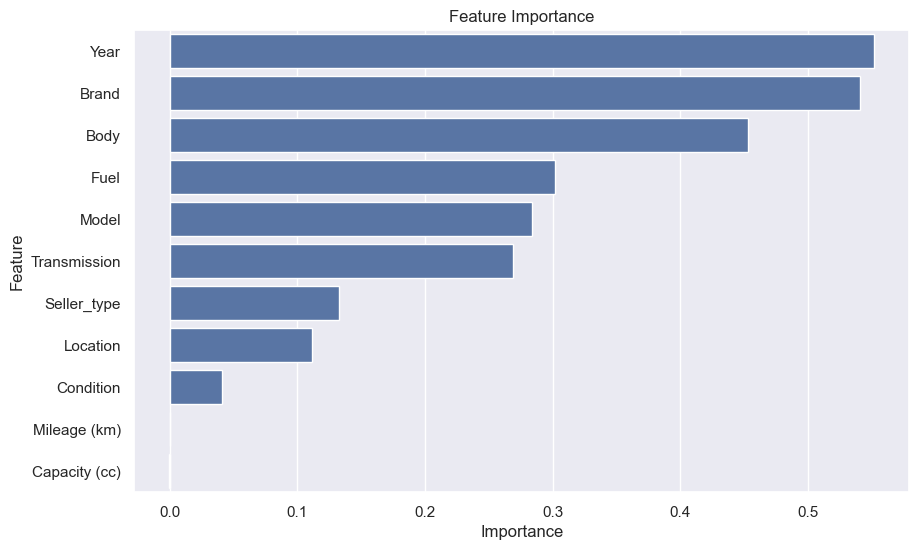

In [180]:
#get features importance for model two
#calculate permutation importance
perm_importance = permutation_importance(model2_Tuned, X_test, y_test, n_repeats=10, random_state=36)

#get features importance
feature_importance2 = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})

#sort features in order of importance
feature_importance2 = feature_importance2.sort_values(by="Importance", ascending=False)

#plot features importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance2)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()